# **EDA - 1**

## **Bike Details Dataset**

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [258]:
#load the dataset
df = pd.read_csv('BIKE DETAILS.csv')

In [259]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [260]:
#show the first five rows of the data
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [261]:
#Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [262]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [263]:
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


In [264]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


In [265]:
#Numerical Columns
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,1.061000e+03
mean,59638.151744,2013.867107,34359.833176,8.172431e+04
std,56304.291973,4.301191,51623.152702,5.997579e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,6.458900e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,7.851300e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [266]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [267]:
cat_cols

['name', 'seller_type', 'owner']

In [268]:
num_cols

['selling_price', 'year', 'km_driven', 'ex_showroom_price']

In [269]:
# Distribution of categorical columns
print(df['seller_type'].value_counts())


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [270]:
(df['owner'].value_counts())


,count
owner,
1st owner,924
2nd owner,123
3rd owner,11
4th owner,3


In [271]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [272]:
#Q1.What is the range of selling prices in the dataset?

In [273]:
selling_price_range = df['selling_price'].max() - df['selling_price'].min()

In [274]:
selling_price_range

755000

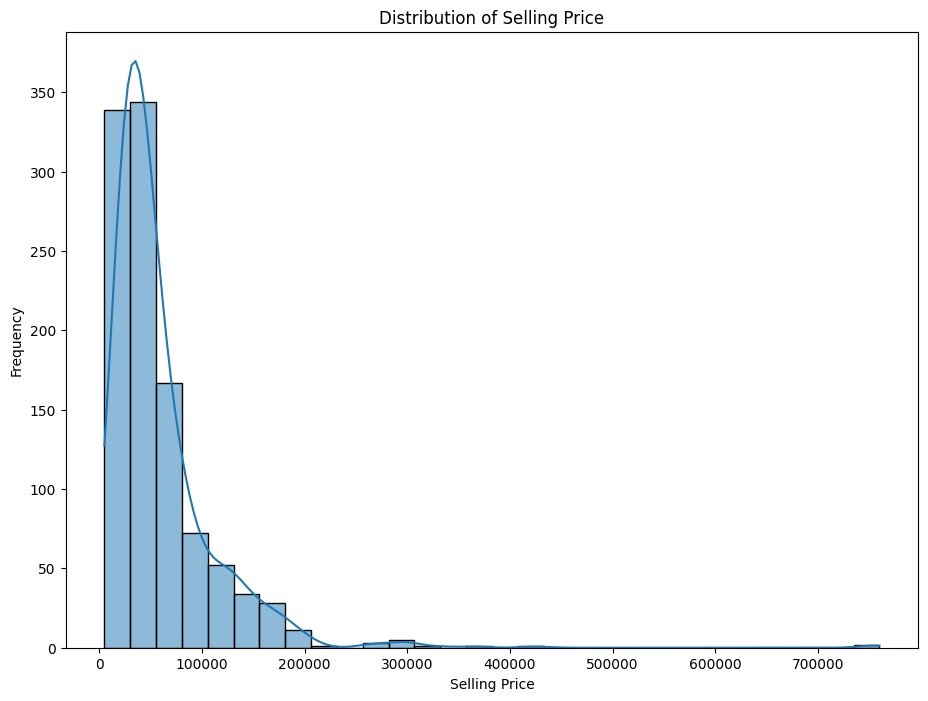

In [275]:
#Selling Price Distribution (Visualization)
plt.figure(figsize = (11, 8))
sns.histplot(df['selling_price'], kde = True,bins = 30 )
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

In [276]:
#Q2.What is the median selling price for bikes in the dataset?

In [277]:
selling_price_median = df['selling_price'].median()


In [278]:
selling_price_median

45000.0

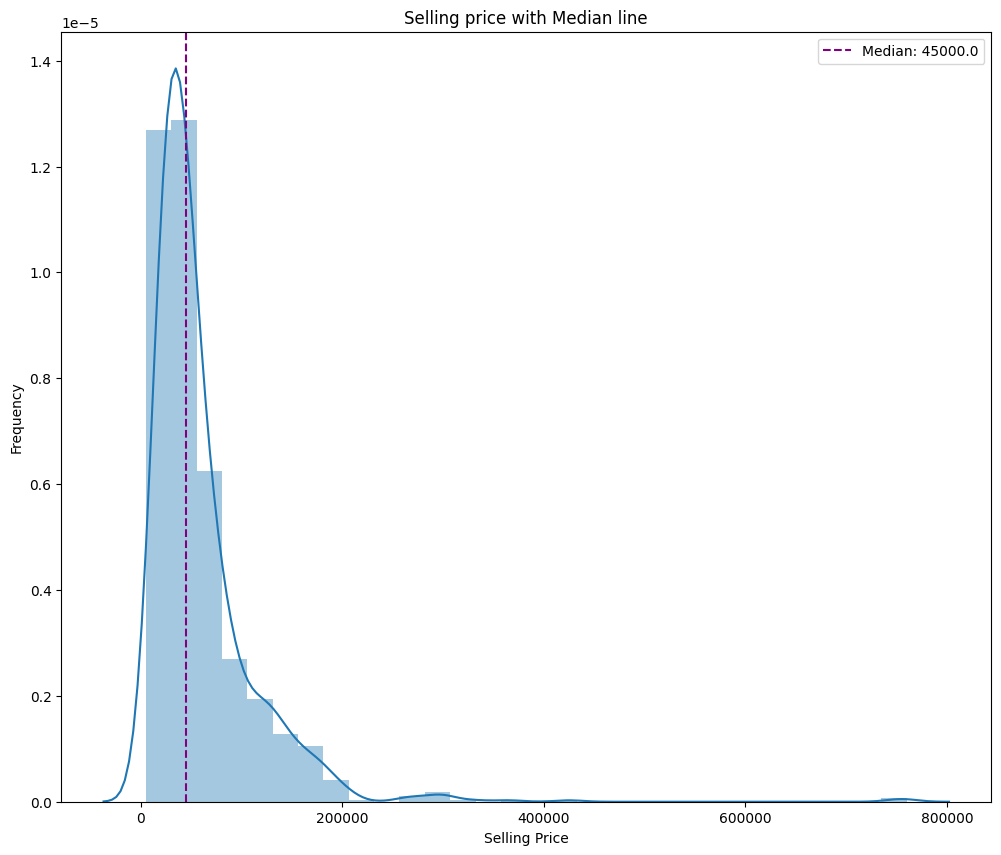

In [279]:
plt.figure(figsize=(12, 10))
sns.distplot(df['selling_price'], kde = True, bins = 30)
plt.axvline(selling_price_median, color = 'purple', linestyle ='--', label=f'Median: {selling_price_median}')
plt.legend()
plt.title('Selling price with Median line')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

In [280]:
#Q3.What is the most common seller type?

In [281]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [282]:
#Most common seller type
most_seller_type = df['seller_type'].mode()[0]


In [283]:
most_seller_type

'Individual'

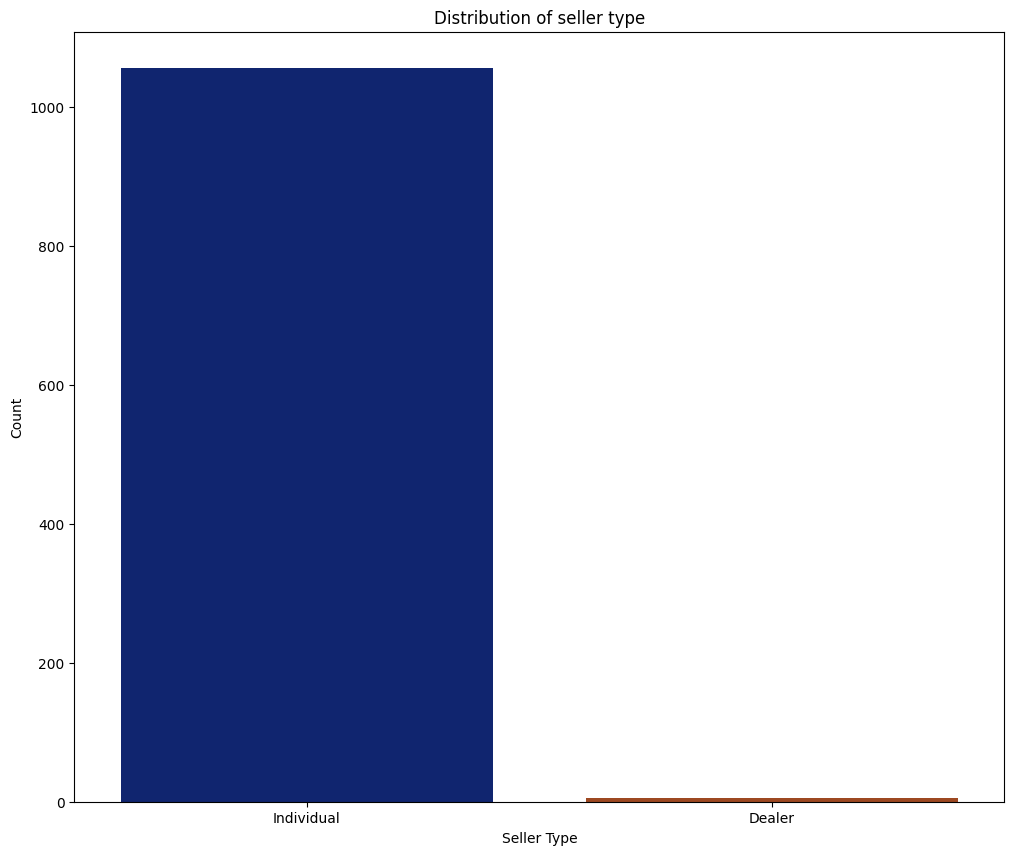

In [284]:
#Bar plot for seller type distribution
plt.figure(figsize = (12, 10))
sns.countplot(x= 'seller_type', data = df,  palette= 'dark')
plt.title('Distribution of seller type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()

In [285]:
#Q4.How many bikes have more than 50,000 kilometers?

In [286]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [287]:
sef = df['km_driven'].value_counts()

In [288]:
sef

,count
km_driven,
20000,39
40000,38
50000,37
25000,31
15000,28
...,...
46070,1
127000,1
63000,1


In [289]:
bikes_over_50km = int(df[df['km_driven']> 50000].shape[0])

In [290]:
bikes_over_50km

170

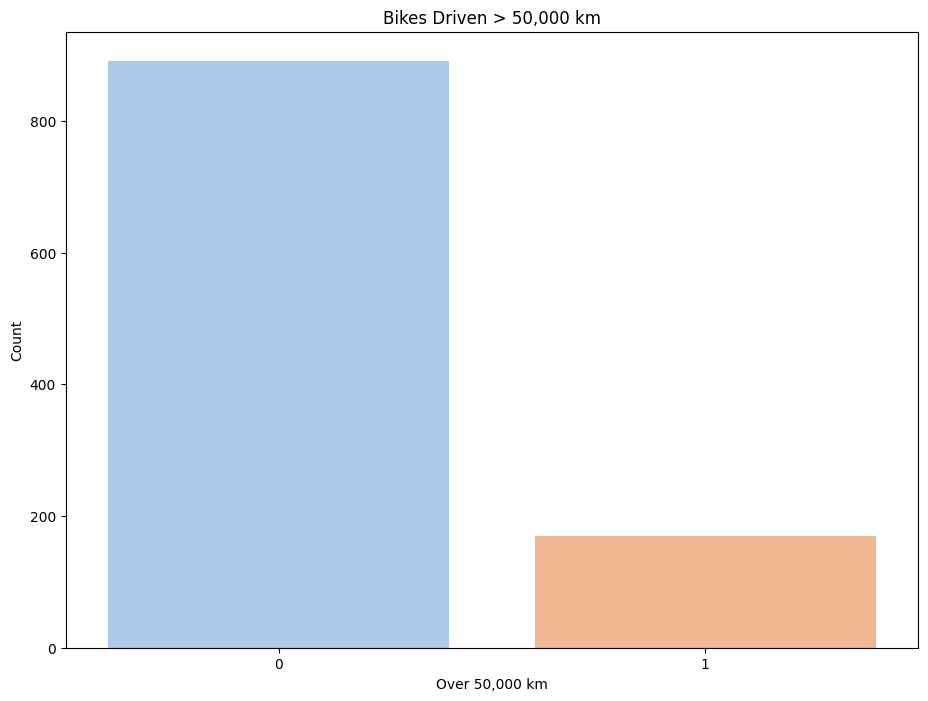

In [291]:
#plotting number of bikes with driven > 50,000 km
plt.figure(figsize=(11,8))
sns.countplot(x=(df['km_driven']> 50000).astype(int), data = df, palette = 'pastel')
plt.title('Bikes Driven > 50,000 km')
plt.xlabel('Over 50,000 km')
plt.ylabel('Count')
plt.show()

In [292]:
#Q5.What is the average km_driven value for each ownership type?

In [293]:
avg_km_per_owner = df.groupby('owner')['km_driven'].mean()


In [294]:
print("Average km_driven per ownership type:",avg_km_per_owner)

Average km_driven per ownership type: owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


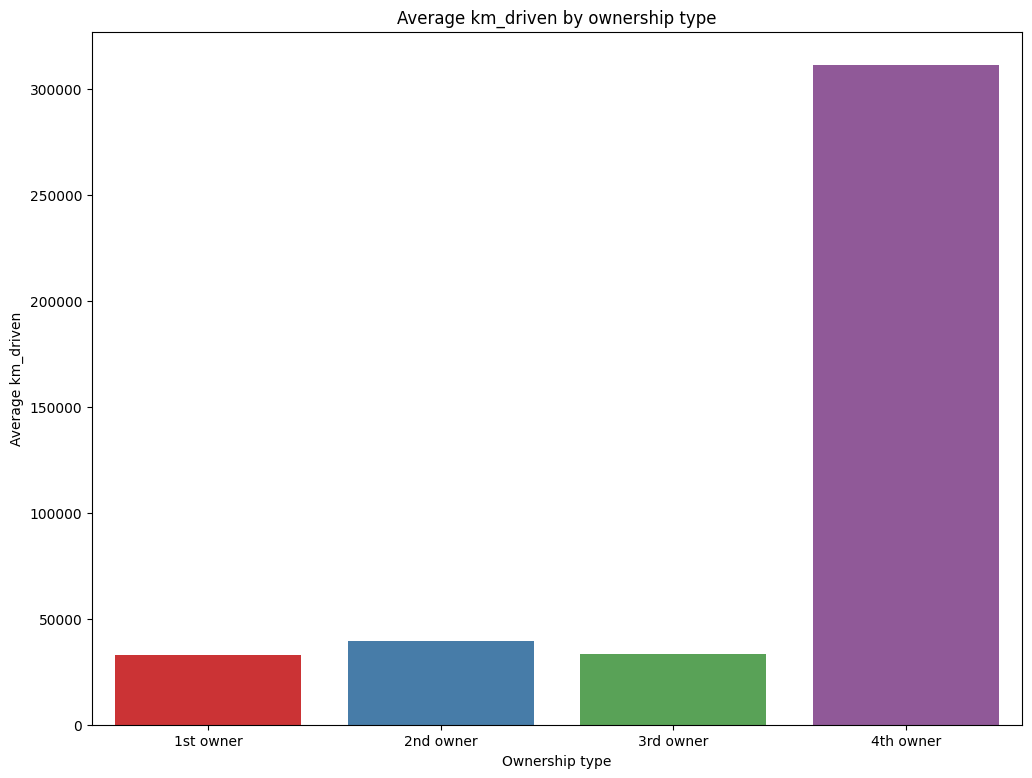

In [295]:
#Bar plot for average km_driven by ownership type
plt.figure(figsize=(12,9))
sns.barplot(x = avg_km_per_owner.index, y = avg_km_per_owner.values, palette = 'Set1')
plt.title("Average km_driven by ownership type")
plt.xlabel('Ownership type')
plt.ylabel('Average km_driven')
plt.show()

In [296]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [297]:
#Q6.What proportion of bikes are form the year 2015 or older?

In [298]:
proportion_2015_older = int(df[df['year']<= 2015].shape[0])

In [299]:
proportion_2015_older

601

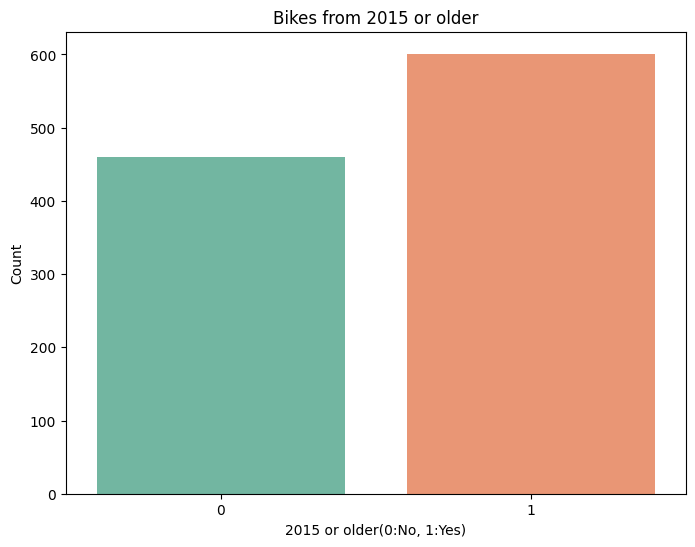

In [300]:
#plot proportion of bikes from 2015 or older
plt.figure(figsize= (8,6))
sns.countplot(x = (df['year']<= 2015).astype(int),palette = 'Set2')
plt.title('Bikes from 2015 or older')
plt.xlabel('2015 or older(0:No, 1:Yes)')
plt.ylabel('Count')
plt.show()

In [301]:
#Q7.What is the trend of missing values across the dataset?


In [302]:
missing_values = df.isnull().sum() /len(df)*100

In [303]:
missing_values

,0
name,0.0
selling_price,0.0
year,0.0
seller_type,0.0
owner,0.0
km_driven,0.0
ex_showroom_price,0.0


In [304]:
#Q8.What is the highest ex_showroom_price recorded, and for which bike?

In [305]:
ex_showroom_price = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]

In [306]:
ex_showroom_price

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [307]:
#Q9.What is the total number of bikes listed by each seller type?

In [308]:
bikes_per_seller_type = df['seller_type'].value_counts()


In [309]:
bikes_per_seller_type

,count
seller_type,
Individual,1055
Dealer,6


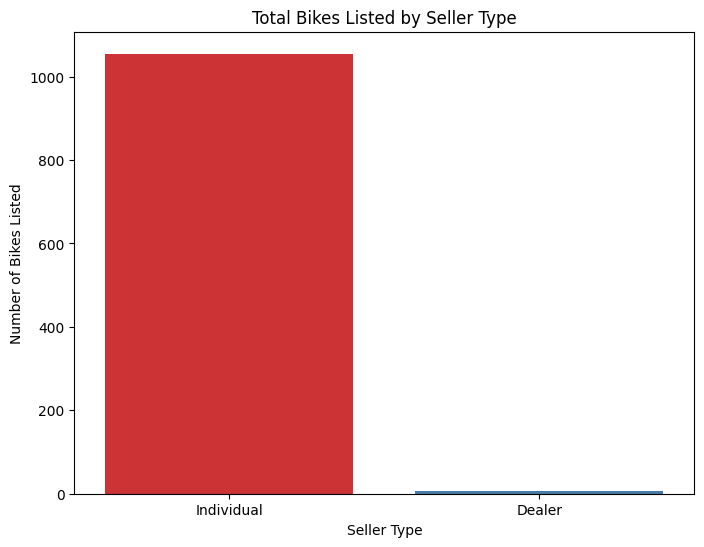

In [310]:
# Plotting total bikes by seller type
plt.figure(figsize=(8,6))
sns.barplot(x=bikes_per_seller_type.index, y=bikes_per_seller_type.values, palette = 'Set1')
plt.title("Total Bikes Listed by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Number of Bikes Listed")
plt.show()


In [311]:
#Q10.What is the relationship between selling_price and km_driven for first-owner bikes?

In [312]:
first_owner_bikes = df[df['owner'] == '1st owner']

In [313]:
first_owner_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


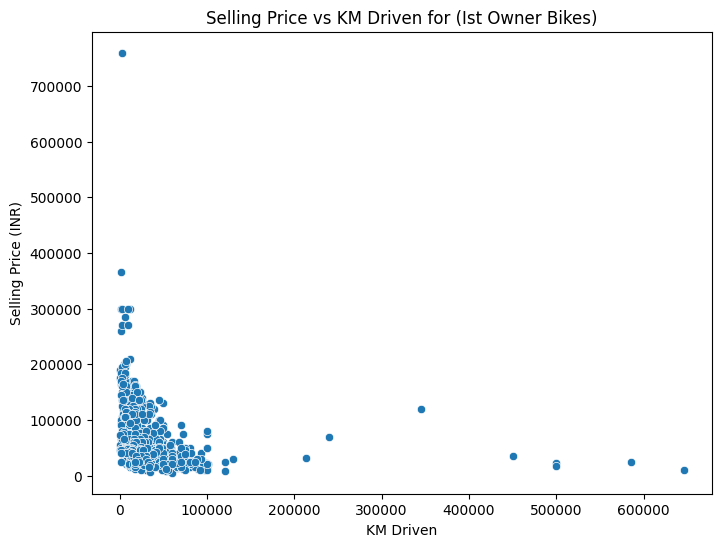

In [314]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'km_driven', y ='selling_price', data=first_owner_bikes)
plt.title('Selling Price vs KM Driven for (Ist Owner Bikes)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price (INR)')
plt.show()

In [315]:
#Q11.Indentify and remove outlier in the km_driven column using the IQR method

In [316]:
# Calculate IQR for km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR))]
print("Outliers in km_driven:")
print(outliers)

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= (Q1 - 1.5 * IQR)) & (df['km_driven'] <= (Q3 + 1.5 * IQR))]
print(f"Data shape before removing outliers: {df.shape}")
print(f"Data shape after removing outliers: {df_no_outliers.shape}")


Outliers in km_driven:
                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  Individual   
548            

In [317]:
#Q12.Perform a bivariate analysis to visualize the relatioship between year and selling_price

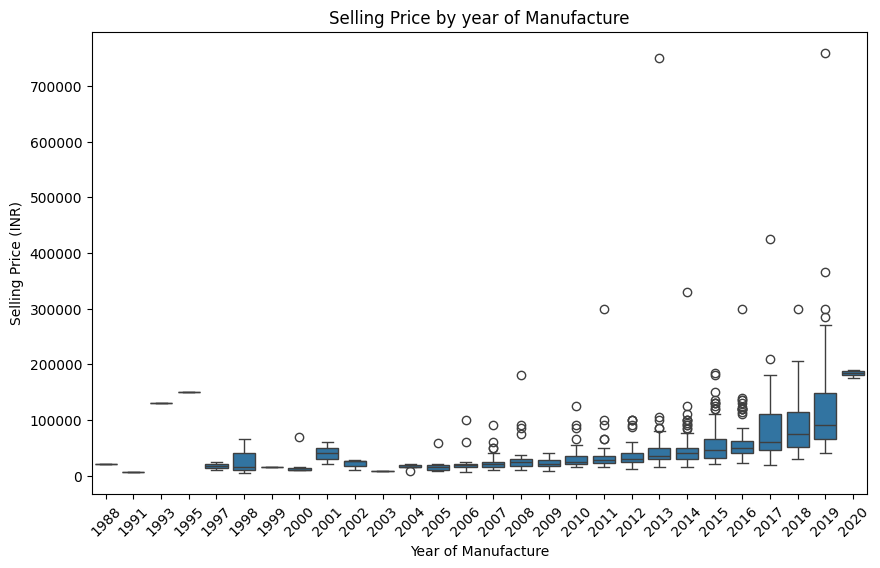

In [318]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'year', y = 'selling_price', data = df)
plt.xticks(rotation = 45)
plt.title('Selling Price by year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price (INR)')
plt.show()

In [319]:
#Q13.What is the average depreciation in selling price based on the bike's age?

Text(0, 0.5, 'Average Selling Price(INR)')

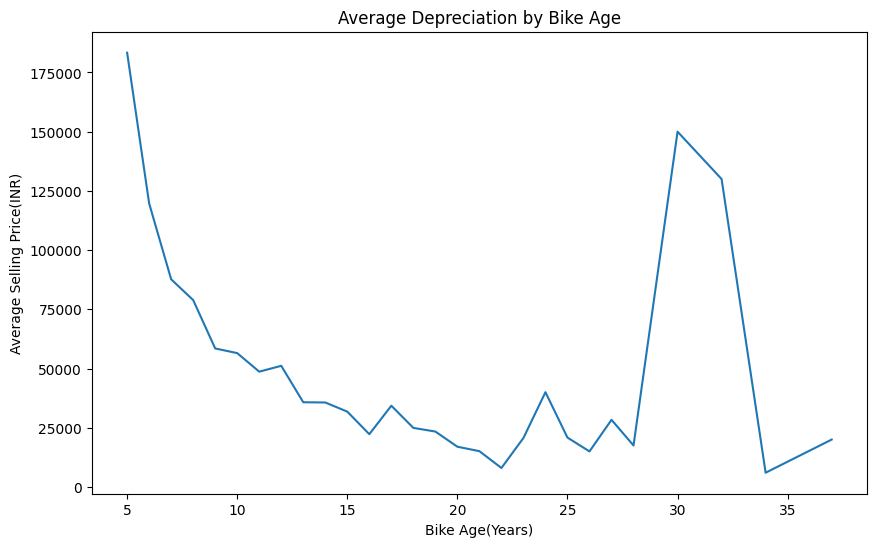

In [320]:
#Calculate bike age
current_year = 2025
df['age'] = current_year - df['year']


#Calculate average depreciation
avg_dep = df.groupby('age')['selling_price'].mean()
avg_dep.plot(kind = 'line', figsize= (10,6))
plt.title('Average Depreciation by Bike Age')
plt.xlabel('Bike Age(Years)')
plt.ylabel('Average Selling Price(INR)')


In [321]:
#Q14.Which bike names are priced significanntly above the average price for their manufacturing year?

In [322]:
#Calculate average selling price per year
avg_price_peryear = df.groupby('year')['selling_price'].mean()



In [323]:
avg_price_peryear

,selling_price
year,
1988,20000.000000
1991,6000.000000
1993,130000.000000
1995,150000.000000
1997,17500.000000
1998,28333.333333
1999,15000.000000
2000,20833.333333
2001,40000.000000


In [324]:
above_avg_bikes = df[df.apply(lambda row: row['selling_price'] > avg_price_peryear[row['year']]* 1.2, axis =1)]

In [325]:
above_avg_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5,6
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,72752.5,17
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,6
17,Yamaha YZF R15 S,40000,2010,Individual,2nd owner,45000,117926.0,15
...,...,...,...,...,...,...,...,...
984,Royal Enfield Classic 500,95000,2014,Individual,1st owner,11500,175000.0,11
985,Royal Enfield Classic 500,90000,2011,Individual,1st owner,40000,175000.0,14
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,11
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,13


In [326]:
print(above_avg_bikes[['name', 'year', 'selling_price']])

                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
17                        Yamaha YZF R15 S  2010          40000
...                                    ...   ...            ...
984              Royal Enfield Classic 500  2014          95000
985              Royal Enfield Classic 500  2011          90000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1023                Bajaj Avenger 220 dtsi  2012          45000

[233 rows x 3 columns]


In [327]:
#Q15.Develop a correlation matix for numeric columns and visualize it using a heatmap

In [328]:
correlation_matrix = df.corr(numeric_only = True)

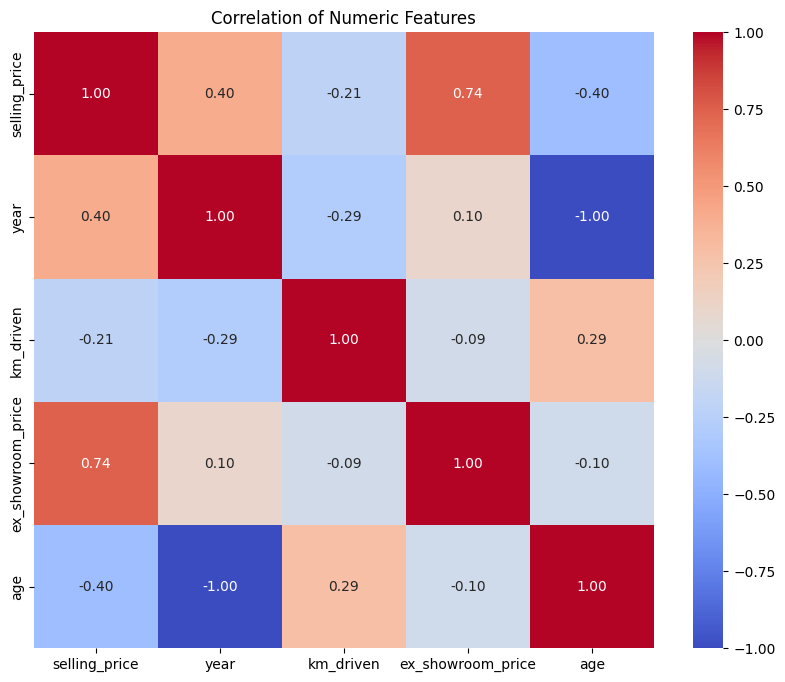

In [329]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Correlation of Numeric Features')
plt.show()

# **EDA-2**

## **Car Sale Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Car Sale.csv')

In [ ]:
df

In [ ]:
#Data Overview
df.info()

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
#Missing Values & Duplicates:

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.columns

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date']

In [ ]:
df['Month'] = df['Date'].dt.month

In [ ]:
df['Month']

In [ ]:
df['Year'] = df['Date'].dt.year

In [ ]:
df['Year']

In [ ]:
#Create Income Brackets

In [ ]:
df['Income Bracket'] = pd.cut(df['Annual Income'], bins = [0, 50000, 100000, 150000, 200000, 1000000], labels=['<50k', '50k-100k','100k-150k', '150k-200k', ' 200k+'])

In [ ]:
df['Income Bracket']

In [ ]:
df

In [ ]:
#Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending = False)

In [ ]:
dealer_avg_price

In [ ]:
plt.figure(figsize = (11,8))
sns.barplot(x=dealer_avg_price.index, y=dealer_avg_price.values)
plt.title('Average Price by Dealer')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Q2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending = False)

In [ ]:
price_variation

In [ ]:
plt.figure(figsize =(11,8))
sns.barplot(x=price_variation.index, y=price_variation.values,color = 'lightgreen')
plt.title('Price Variation by Company')
plt.ylabel('Price Variation ($)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns

In [ ]:
#Q3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize = (11,8))
sns.boxplot(x = 'Transmission', y = 'Price ($)', data = df,palette = 'Set2')
plt.title('Price Distribution by Transmission Type')
plt.ylabel('Price ($)')
plt.show()

In [ ]:
#Q4.What is the distribution of car prices across different regions?
plt.figure(figsize = (11,8))

sns.barplot(x = 'Dealer_Region', y = 'Price ($)', hue= 'Dealer_Region', data = df, palette = 'Set2')

plt.title('Distributin of car prices by region')
plt.ylabel('Price ($)')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='black', alpha=0.7)
plt.show()

In [ ]:
#Q5.What is the distribution of cars based on body styles?
plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=df, palette='Set2')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

In [ ]:
bins = [0, 30000, 60000, 90000, 120000,float('inf')]
labels = ['<30k', '30k-60k','60k-90k','90k-120k','120k+']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

In [ ]:
df['Income Bracket']

In [ ]:
#Group y gender and Income Bracket, then calculate average price
avg_price = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().reset_index()

In [ ]:
avg_price

In [ ]:
#Plot
plt.figure(figsize=(11,6))
sns.barplot(x='Income Bracket', y='Price ($)', hue = 'Gender', data=avg_price, palette='pastel')
plt.title('Average Price by Income Bracket and Gender')
plt.xlabel('Income Bracket')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Pivot table to reshape for heatmap
pivot_table = df.pivot_table(values='Price ($)', index='Income Bracket', columns='Gender', aggfunc='mean')


In [ ]:
#Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Car Price by Gender and Income Bracket')
plt.xlabel('Gender')
plt.ylabel('Income Bracket')
plt.tight_layout()
plt.show()

In [ ]:
#Q7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
#1 row, 2 columns
figs, axes = plt.subplots(1, 2, figsize=(10, 6))

#Boxplot for Price Distribution by Region
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, ax=axes[0], palette='Set3')
axes[0].set_title('Car Price Distribution by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Price ($)')
axes[0].tick_params(axis='x', rotation=45)


#Count plot for Cars Sold by Region
sns.countplot(x='Dealer_Region', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Number of Cars Sold by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Number of Cars Sold')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending = False).reset_index()

In [ ]:
avg_price_by_engine

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Engine', y='Price ($)', data=avg_price_by_engine, palette='coolwarm')
plt.title('Average Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Q9.How do car prices vary based on the customer’s annual income bracket?

In [ ]:
bins = [0, 40000, 80000, 120000, 200000]
labels = ['Low Income', 'Middle Income', 'Upper-Middle Income', 'High Income']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)


In [ ]:
df['Income Bracket']

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Bracket', y='Price ($)', data=df, palette='Set2')
plt.title('Car Price Distribution by Annual Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Car Price ($)')
plt.xticks(rotation=15)
plt.show()

In [ ]:
#Q10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top5_models = df.groupby('Model')['Price ($)'].count().nlargest(5).index

In [ ]:
#filter the data for these models
top5_models_df = df[df['Model'].isin(top5_models)]

In [ ]:
top5_models

In [ ]:
top5_models_df

In [ ]:
plt.figure(figsize = (11,8))
sns.barplot(x ='Model', y='Price ($)', data = top5_models_df, palette = 'pastel')
plt.title('Top 5 Car Models with Highest Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Q11.Identify and remove outliers in the km_driven column using the IQR method?

In [ ]:
#check if 'km_driven' exists in the dataset
if 'km_driven' in df.columns:
    Q1 = df['km_driven'].quantile(0.25)
    Q3 = df['km_driven'].quantile(0.75)

    IQR = Q3 - Q1

    #define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

    #show how many rows were removed
    print(f"Removed {df.shape[0] - df_clean.shape[0]} outliers from 'km_driven'")
else:
    print("Column 'km_driven' not found in the dataset.")

In [ ]:
#Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price?
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='Price ($)', data=df, palette='coolwarm')

plt.title('Selling Price Distribution per Year')
plt.xlabel('Year')
plt.ylabel('Selling Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Q13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
#Calculate bike age
df['Bike_Age'] = 2025 - df['year']

#Group by Bike Age and calculate average price
avg_depreciation = df.groupby('Bike_Age')['Price ($)'].mean().reset_index()



In [ ]:
avg_depreciation

In [ ]:
#Plot the depreciation trend
plt.figure(figsize=(10,6))
sns.lineplot(x='Bike_Age', y='Price ($)', data=avg_depreciation, marker='o')
plt.title('Average Depreciation in Selling Price by Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price ($)')
plt.grid(True)
plt.show()

In [ ]:
#Q14.Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
#Group by year and calculate mean and std
avg_std_by_year = df.groupby('year')['Price ($)'].agg(['mean', 'std'])

#Use apply to check which rows are significantly above average
def is_significantly_above(row):
    avg = avg_std_by_year.loc[row['year'], 'mean']
    std = avg_std_by_year.loc[row['year'], 'std']
    return row['Price ($)'] > (avg + 1.5 * std)

#Filter those bikes
df['Above_Avg'] = df.apply(is_significantly_above, axis=1)

#Show results
above_avg_bikes = df[df['Above_Avg']][['Model', 'year', 'Price ($)']]
print(above_avg_bikes.sort_values(by='Price ($)', ascending=False))


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='Price ($)', hue='is_above_avg',  palette='muted')
plt.title('Bikes Priced Significantly Above Yearly Average')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price ($)')
plt.legend(title='Above Avg Price')
plt.grid(True)
plt.show()


In [ ]:
#Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [ ]:
#Select only numeric columns
numeric_df = df.select_dtypes(include='number')

In [ ]:
numeric_df

In [ ]:
#Compute the correlation matrix
correlation_matrix = numeric_df.corr()

In [ ]:
correlation_matrix

In [ ]:
#Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# **EDA-3**

## **Amozan Sales Data**

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

In [155]:
df = pd.read_csv('amazon.csv')

In [156]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [136]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [137]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [138]:
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [139]:
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [140]:
#convert into numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [141]:
#Q1.What is the average rating for each product category?
avg_rating = df.groupby('category')['rating'].mean().reset_index()

In [142]:
avg_rating

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [143]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [144]:
#Q2.What are the top rating_count products by category?
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df = df.dropna(subset=['rating_count', 'category', 'product_name'])  #Adjust column names as needed


In [145]:
df['rating_count']

,rating_count
20,815.0
28,184.0
32,974.0
33,355.0
37,576.0
...,...
1453,195.0
1456,113.0
1458,550.0
1459,2.0


In [146]:
topproducts = (df.sort_values(['category','rating_count'], ascending=[True,False]).groupby('category').head(5))

In [147]:
topproducts[['category','product_name','rating_count']]

,category,product_name,rating_count
900,Computers&Accessories|Accessories&Peripherals|...,Lapster USB 3.0 sata Cable for 2.5 inch SSD an...,817.0
32,Computers&Accessories|Accessories&Peripherals|...,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
151,Computers&Accessories|Accessories&Peripherals|...,Zoul USB Type C Fast Charging 3A Nylon Braided...,974.0
823,Computers&Accessories|Accessories&Peripherals|...,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
147,Computers&Accessories|Accessories&Peripherals|...,Ambrane Fast 100W Output Cable with Type-C to ...,919.0
...,...,...,...
1424,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,KENT POWP-Sediment Filter 10'' Thread WCAP,490.0
1449,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,IONIX Tap filter Multilayer | Activated Carbon...,159.0
1308,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,AVNISH Tap Water Purifier Filter Faucet 6 Laye...,37.0
808,OfficeProducts|OfficePaperProducts|Paper|Copy&...,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,388.0


In [ ]:
#Q3.What is the distribution of discounted prices vs. actual prices?

In [151]:
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

#Drop missing values
df = df.dropna(subset=['actual_price', 'discounted_price'])

In [161]:
df['actual_price']

,actual_price
0,"₹1,099"
1,₹349
2,"₹1,899"
3,₹699
4,₹399
...,...
1460,₹919
1461,"₹3,045"
1462,"₹3,080"
1463,"₹1,890"


In [158]:
df['discounted_price']

,discounted_price
0,₹399
1,₹199
2,₹199
3,₹329
4,₹154
...,...
1460,₹379
1461,"₹2,280"
1462,"₹2,219"
1463,"₹1,399"


In [ ]:
#Q4.How does the average discount percentage vary across categories?

In [176]:
#Remove currency,symbol,commas,space
df['actual_price'] = df['actual_price'].str.replace(r'[^\d.]', '', regex=True)
df['discounted_price'] = df['discounted_price'].str.replace(r'[^\d.]', '', regex=True)

In [177]:
#convert to float
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')


In [182]:
#Drop nan and invalid values
df = df.dropna(subset=['actual_price', 'discounted_price', 'category'])
df = df[df['actual_price'] > 0]

In [183]:
#Calculate discount percentage
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

In [184]:
df['actual_price']

,actual_price
0,1099.0
1,349.0
2,1899.0
3,699.0
4,399.0
...,...
1460,919.0
1461,3045.0
1462,3080.0
1463,1890.0


In [168]:
df['discount_percentage']

,discount_percentage
0,64%
1,43%
2,90%
3,53%
4,61%
...,...
1460,59%
1461,25%
1462,28%
1463,26%


In [186]:
#Average discount by category
avg_discount = df.groupby('category')['discount_percentage'].mean().reset_index()
avg_discount = avg_discount.sort_values(by='discount_percentage', ascending=False)

In [187]:
avg_discount

,category,discount_percentage
6,Computers&Accessories|Accessories&Peripherals|...,90.090090
75,"Electronics|Headphones,Earbuds&Accessories|Ear...",90.090090
106,Electronics|Mobiles&Accessories|MobileAccessor...,90.090090
73,"Electronics|Headphones,Earbuds&Accessories|Ada...",87.987988
14,Computers&Accessories|Accessories&Peripherals|...,87.722505
...,...,...
197,OfficeProducts|OfficeElectronics|Calculators|F...,0.000000
199,OfficeProducts|OfficePaperProducts|Paper|Copy&...,0.000000
205,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.000000
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.000000


In [190]:
df['rating_count'] = pd.to_numeric(df['rating_count'], errors = 'coerce')

In [191]:
df['rating_count']

,rating_count
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1460,NaN
1461,NaN
1462,468.0
1463,NaN


In [193]:
df['rating_count'].tail()

,rating_count
1460,NaN
1461,NaN
1462,468.0
1463,NaN
1464,NaN


In [195]:
#drop missing values
df = df.dropna(subset=['rating_count', 'product_name'])


In [197]:
#group by product name and sum or count
popular_products = df.groupby('product_name')['rating_count'].sum().reset_index()
popular_products = df[['product_name', 'rating_count']]


In [200]:
popular_products = popular_products.sort_values(by='rating_count', ascending=False)
top_n = popular_products.head(10)  #Top 10


In [201]:
top_n

,product_name,rating_count
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0
750,Eveready Red 1012 AAA Batteries - Pack of 10,989.0
1059,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976.0
32,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
823,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
151,Zoul USB Type C Fast Charging 3A Nylon Braided...,974.0
1272,Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...,959.0
1259,Hindware Atlantic Xceed 5L 3kW Instant Water H...,942.0
214,Crypo™ Universal Remote Compatible with Tata S...,928.0
1262,iBELL Castor CTEK15L Premium 1.5 Litre Stainle...,925.0


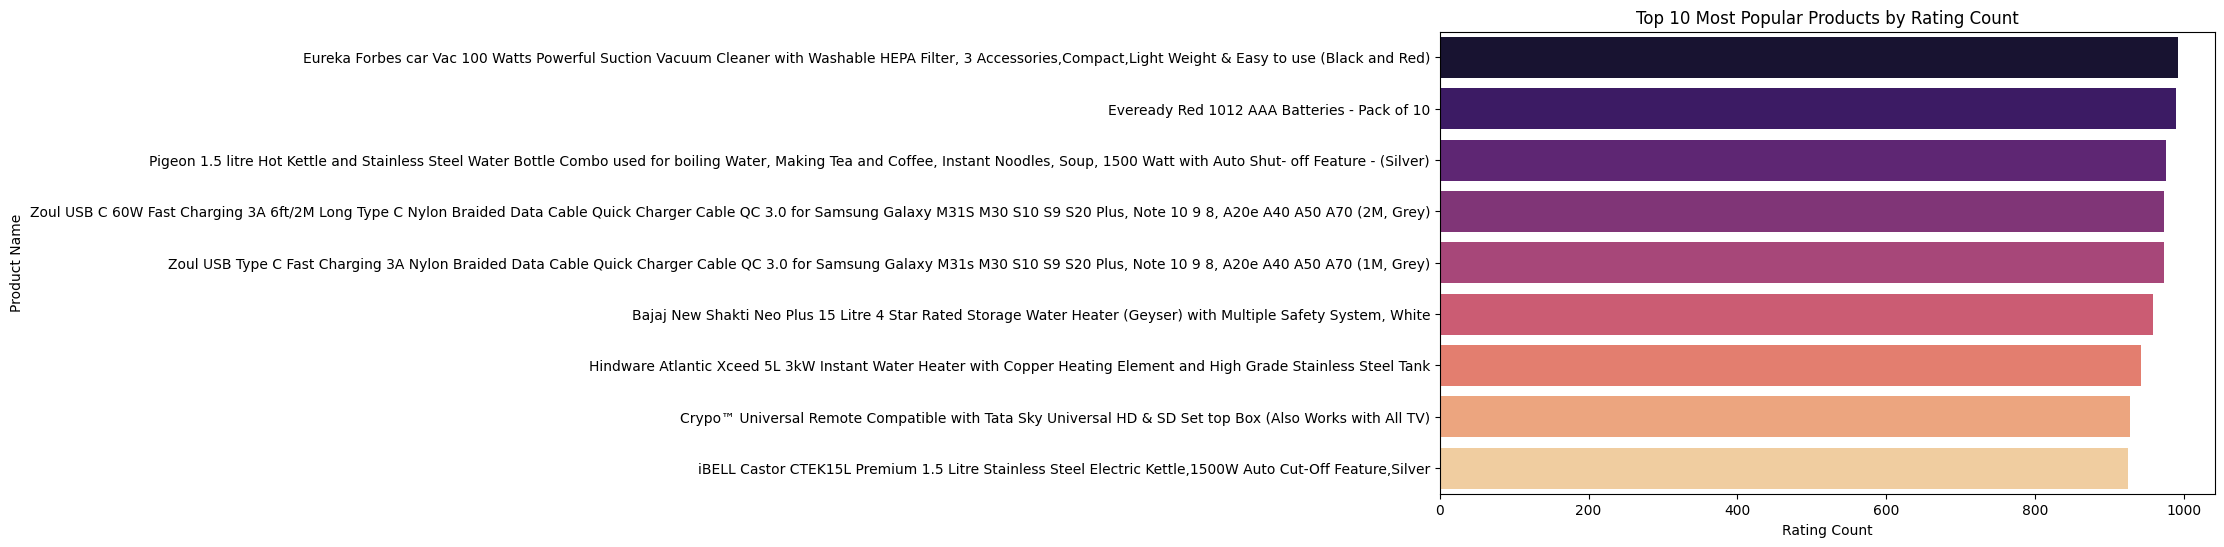

In [208]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_n, y='product_name', x='rating_count', palette='magma')
plt.title('Top 10 Most Popular Products by Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [ ]:
#Q6.What are the most popular product keywords?

In [210]:
#Clean product names
df = df.dropna(subset=['product_name'])
df['product_name'] = df['product_name'].str.lower()

In [211]:
df['product_name']

,product_name
20,duracell usb lightning apple certified (mfi) b...
28,duracell usb c to lightning apple certified (m...
32,zoul usb c 60w fast charging 3a 6ft/2m long ty...
33,samsung original type c to c cable - 3.28 feet...
37,"sounce 65w oneplus dash warp charge cable, 6.5..."
...,...
1453,usha hc 812 t thermo fan room heater
1456,"4 in 1 handheld electric vegetable cutter set,..."
1458,"libra room heater for home, room heaters home ..."
1459,ngi store 2 pieces pet hair removers for your ...


In [212]:
#Remove punctuation and split
df['tokens'] = df['product_name'].apply(lambda x : re.findall(r'\b\w+\b', x))

In [213]:
df['tokens']

,tokens
20,"[duracell, usb, lightning, apple, certified, m..."
28,"[duracell, usb, c, to, lightning, apple, certi..."
32,"[zoul, usb, c, 60w, fast, charging, 3a, 6ft, 2..."
33,"[samsung, original, type, c, to, c, cable, 3, ..."
37,"[sounce, 65w, oneplus, dash, warp, charge, cab..."
...,...
1453,"[usha, hc, 812, t, thermo, fan, room, heater]"
1456,"[4, in, 1, handheld, electric, vegetable, cutt..."
1458,"[libra, room, heater, for, home, room, heaters..."
1459,"[ngi, store, 2, pieces, pet, hair, removers, f..."


In [214]:
#Flatten all tokens into one list
from collections import Counter

all_keywords = [word for tokens in df['tokens'] for word in tokens]
keywords_counts = Counter(all_keywords)

In [217]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_keywords = {word: count for word, count in keywords_counts.items() if word not in stop_words}

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [218]:
#Get top N Keywords
top_keywords = Counter(filtered_keywords).most_common(20)


In [219]:
top_keywords

[('cable', 116),
 ('1', 101),
 ('black', 97),
 ('c', 89),
 ('usb', 82),
 ('remote', 69),
 ('compatible', 66),
 ('tv', 61),
 ('type', 59),
 ('heater', 59),
 ('charging', 57),
 ('fast', 54),
 ('3', 53),
 ('2', 49),
 ('electric', 47),
 ('smart', 45),
 ('white', 44),
 ('led', 41),
 ('room', 36),
 ('home', 34)]

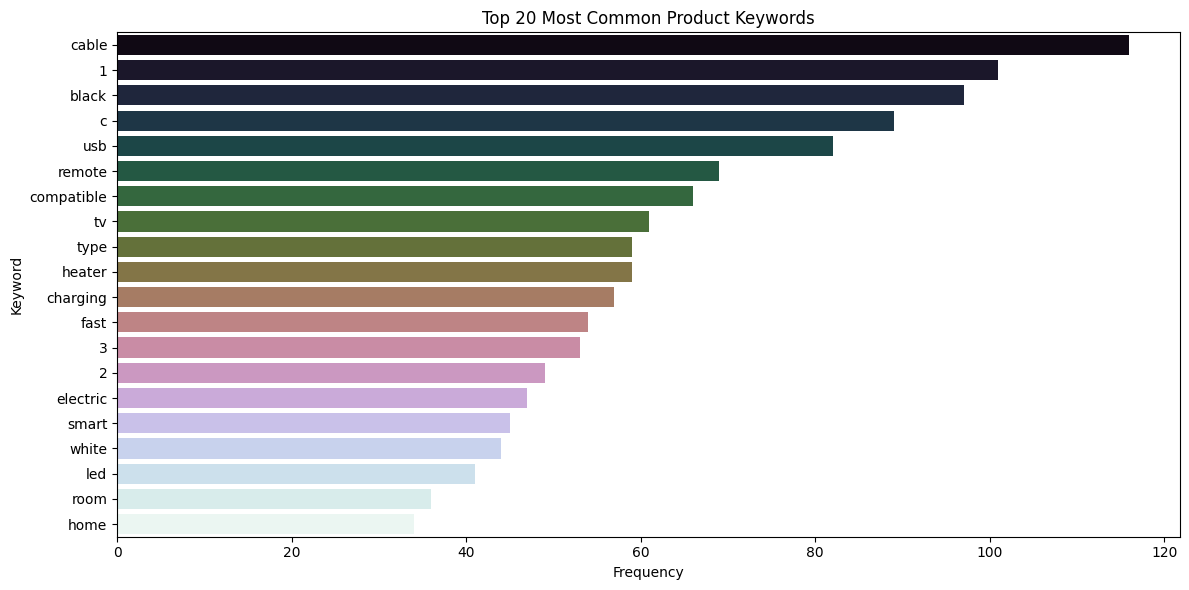

In [222]:
words, counts = zip(*top_keywords)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette='cubehelix')
plt.title('Top 20 Most Common Product Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()


In [ ]:
#Q7.What are the most popular product reviews?

In [225]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'tokens'],
      dtype='object')

In [237]:
# Drop rows without reviews
df = df.dropna(subset=['review_content'])

#Count the most frequent review texts
most_common_reviews = df['review_content'].value_counts().head(10)

#Convert to DataFrame for better readability
popular_reviews = most_common_reviews.reset_index()
popular_reviews.columns = ['review_content', 'count']

#Display
print(popular_reviews)

                                      review_content  count
0  I am not big on camera usage, personally. I wa...      8
1  Good product,long wire,Charges good,Nice,I bou...      7
2  I ordered this cable to connect my phone to An...      7
3  Worked on iPhone 7 and didn’t work on iPhone X...      7
4  I purchased the 6/128gb variant.To sum  it up ...      6
5  128GB SD Card is showing 134GBDon't buy this p...      6
6  Everything is fine but it is bulky and hard, i...      5
7  Good budget mfi certified lightly cable for th...      5
8  About the TV - Wonderful----------------------...      5
9  I liked it, worth the money, light weight and ...      5


In [ ]:
#Q8.What is the correlation between discounted_price and rating?

In [253]:
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between discounted_price and rating: {correlation:.4f}")


Correlation between discounted_price and rating: 0.1203


In [254]:
#Q9. What are the Top 5 categories based on the highest ratings?
avg_rating_by_category = df.groupby('category')['rating'].mean().reset_index()
top5_categories = avg_rating_by_category.sort_values(by='rating', ascending=False).head(5)
print(top5_categories)


                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


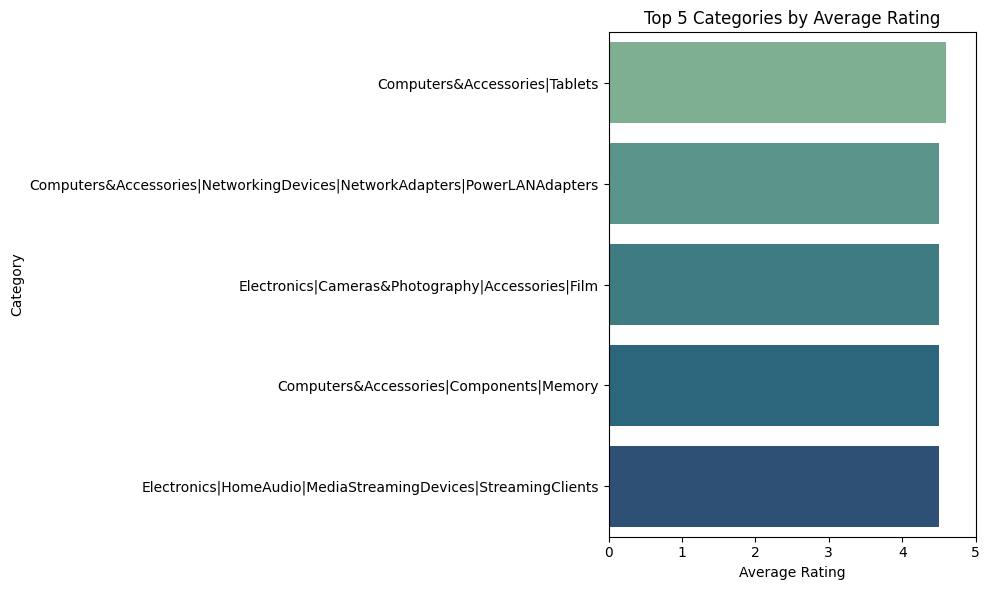

In [255]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_categories, x='rating', y='category', palette='crest')
plt.title('Top 5 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


**Q10.Identify any potential areas for improvement or optimization based on the data analysis**

**1. Pricing Strategy Optimization**
* **Observation:** If high ratings correlate more with mid-range prices, that price band may be the sweet spot for value perception.

* **Action:** Adjust pricing to match consumer expectation for quality at certain price points.

**2. Product Category Performance**
* **Observation:** Some categories may consistently receive lower average ratings.

* **Action:**

 * Investigate those underperforming categories.

 * Improve product quality or customer experience in those segments.

 * Consider phasing out poorly performing categories or revamping them.

**3. Review Quality & Monitoring**
* **Observation:** Many reviews might be generic ("Good product", "Nice", etc.).

* **Action:**

  * Encourage more detailed reviews by prompting users (e.g., “What did you like most?”).

  * Use NLP sentiment analysis to automatically classify and flag poor experiences.

**4. Discount Strategy**
* **Observation:** If large discounts don’t lead to better ratings, they might not increase perceived value.

* **Action:**

 * Reevaluate which products receive discounts.

 * Possibly optimize the balance between discount level and actual product quality.

**5. Rating Count vs Rating Quality**

* **Observation:** Some products might have high ratings but very few reviews.

* **Action:**

 * Focus on building trust by increasing genuine review counts through post-purchase engagement.

 * Sort/rank products by both average rating and volume of reviews.

**6. Keyword & Search**
Optimization
* **Observation:** Certain product keywords are far more common/popular.

* **Action:**

 * Use the most frequent keywords in product listings, SEO, and ads.

 * Target those keywords in marketing campaigns to match customer language.

**7. Inventory Optimization**
* **Observation:** If certain categories or products are very popular but have limited presence, there’s a demand gap.

* **Action:**

 * Stock more of highly rated and frequently purchased items.

 * Phase out low-rated, low-demand items.

**8. Data Quality Improvements**
* **Observation:** Many fields had issues — non-numeric prices, missing reviews, etc.

* **Action:**

 * Clean the dataset regularly before analysis.

 * Encourage standardized product entry and user review formats.



# **EDA-4**
## **Spotify Dataset**

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [331]:
#Load the dataset
df = pd.read_csv('spotify.csv')

In [ ]:
#Q1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [332]:
#show some basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [333]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [334]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [335]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [336]:
#check the missing values
print(df.isnull().sum())

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [337]:
#drop rows with nulls or fill them, depending on the data importance
df_cleaned = df.dropna()

In [338]:
df_cleaned

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [339]:
print(df_cleaned.isnull().sum)

<bound method DataFrame.sum of      Artist  Track Name  Popularity  Duration (ms)  Track ID
0     False       False       False          False     False
1     False       False       False          False     False
2     False       False       False          False     False
3     False       False       False          False     False
4     False       False       False          False     False
..      ...         ...         ...            ...       ...
435   False       False       False          False     False
436   False       False       False          False     False
437   False       False       False          False     False
438   False       False       False          False     False
439   False       False       False          False     False

[440 rows x 5 columns]>


In [ ]:
#Check and handle duplicate rows

In [340]:
df_cleaned.duplicated().sum()

np.int64(27)

In [341]:
#Drop duplicated rows
df_cleaned = df_cleaned.drop_duplicates()

In [342]:
df_cleaned

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


In [343]:
print('New shape', df_cleaned.shape)

New shape (413, 5)


In [345]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

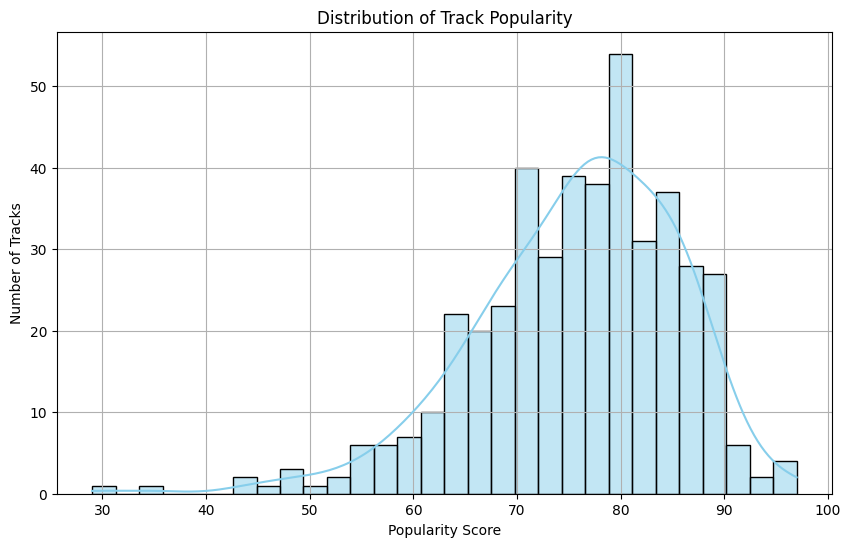

In [346]:
#Q2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
#Convert 'popularity' to numeric, just in case
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

#Drop any missing values in popularity
df = df.dropna(subset=['Popularity'])

#Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()











In [349]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [351]:
#Q3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
#drop missing values
df = df.dropna(subset=['Popularity', 'Duration (ms)'])
#convert duration from milliseconds to minute
df['duration_min'] = df['Duration (ms)'] / 60000

In [352]:
df['duration_min']

,duration_min
0,5.319850
1,2.899767
2,4.335183
3,4.124067
4,3.639400
...,...
435,3.697717
436,3.198333
437,4.728217
438,3.673467


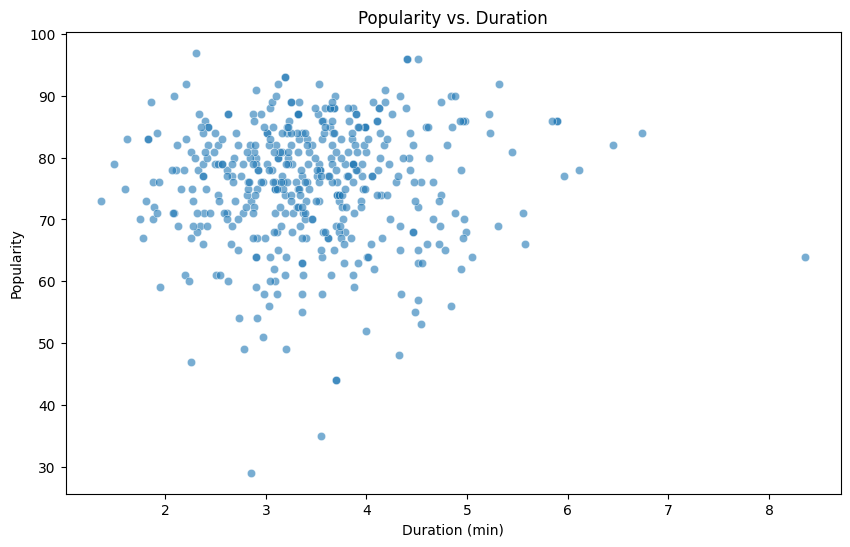

In [359]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='duration_min', y='Popularity', alpha=0.6)
plt.title('Popularity vs. Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.show()

In [361]:
#Q4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
artist_counts = df['Artist'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Track Name']

In [362]:
artist_counts.columns

Index(['Artist', 'Track Name'], dtype='object')

In [363]:
top_artists = artist_counts.head(10)

In [364]:
top_artists

,Artist,Track Name
0,Drake,20
1,Travis Scott,12
2,21 Savage,11
3,Lil Nas X,11
4,Eminem,11
5,¥$,11
6,JAY-Z,10
7,Lil Baby,10
8,Ludacris,10
9,Flo Rida,10


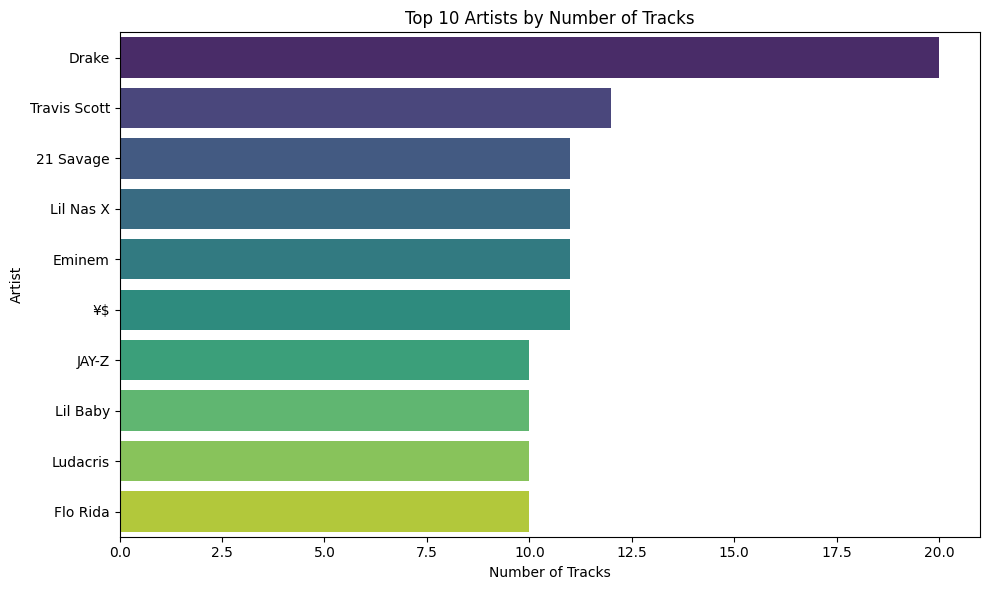

In [367]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists, x='Track Name', y='Artist', palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [370]:
#Q5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)


In [371]:
least_popular_tracks

,Artist,Track Name,Popularity,Duration (ms),Track ID,duration_min
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb,2.850000
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK,3.547550
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN,3.697717
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN,3.697717
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB,2.257400


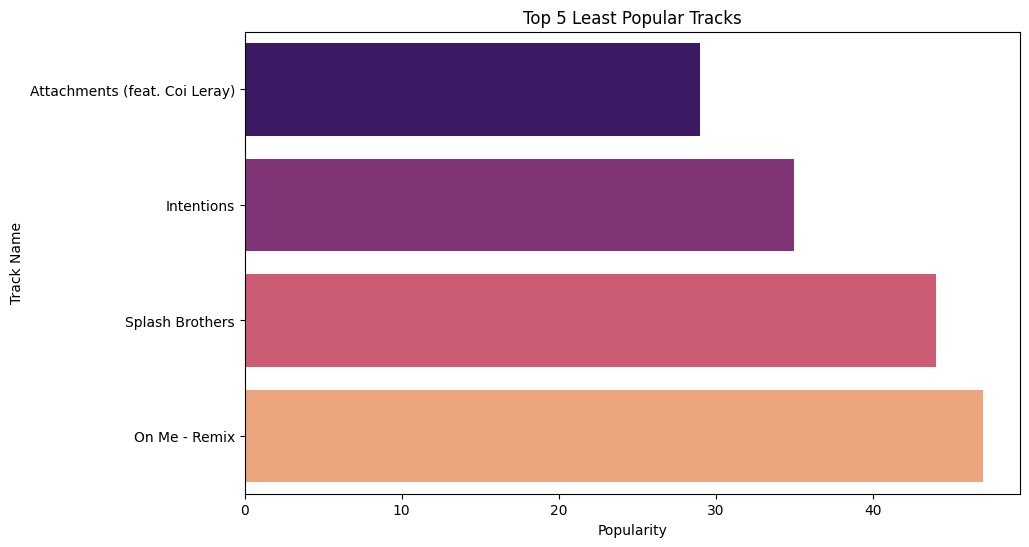

In [373]:
plt.figure(figsize=(10,6))
sns.barplot(data=least_popular_tracks, x='Popularity', y='Track Name', palette='magma')
plt.title('Top 5 Least Popular Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.show()

In [375]:
#Q6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?
df = df.dropna(subset=['Popularity', 'Artist'])


In [378]:
#Total popularity by artist
total_popularity = df.groupby('Artist')['Popularity'].sum().reset_index()


In [379]:
total_popularity

,Artist,Popularity
0,*NSYNC,67
1,2 Chainz,72
2,21 Savage,926
3,A Boogie Wit da Hoodie,80
4,A$AP Ferg,69
...,...,...
110,Young Nudy,67
111,Young Thug,295
112,benny blanco,72
113,cassö,92


In [380]:
top5_artists = total_popularity.sort_values(by='Popularity', ascending=False).head(5)['Artist']


In [381]:
top5_artists

,Artist
29,Drake
103,Travis Scott
114,¥$
2,21 Savage
33,Eminem


In [383]:

#filtered orginal Dataframe
filtered_df = df[df['Artist'].isin(top5_artists)]


In [384]:
filtered_df

,Artist,Track Name,Popularity,Duration (ms),Track ID,duration_min
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6,5.319850
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0,2.899767
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE,4.335183
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU,4.124067
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe,3.639400
...,...,...,...,...,...,...
294,Drake,Wants and Needs (feat. Lil Baby),81,192956,65OVbaJR5O1RmwOQx0875b,3.215933
298,Drake,Girls Want Girls (with Lil Baby),78,221979,37Nqx7iavZpotJSDXZWbJ3,3.699650
410,Drake,Money In The Grave (Drake ft. Rick Ross),79,205426,5ry2OE6R2zPQFDO85XkgRb,3.423767
417,Drake,You Only Live Twice (with Lil Wayne & Rick Ross),65,213103,50ceCGZ3oD3U5caQV5bP6f,3.551717


In [385]:
#Calculate average popularity for each of those top 5
average_popularity = filtered_df.groupby('Artist')['Popularity'].mean().reset_index()
average_popularity = average_popularity.sort_values(by='Popularity', ascending=False)

In [386]:
average_popularity

,Artist,Popularity
3,Travis Scott,87.000000
4,¥$,86.090909
0,21 Savage,84.181818
2,Eminem,83.636364
1,Drake,83.500000


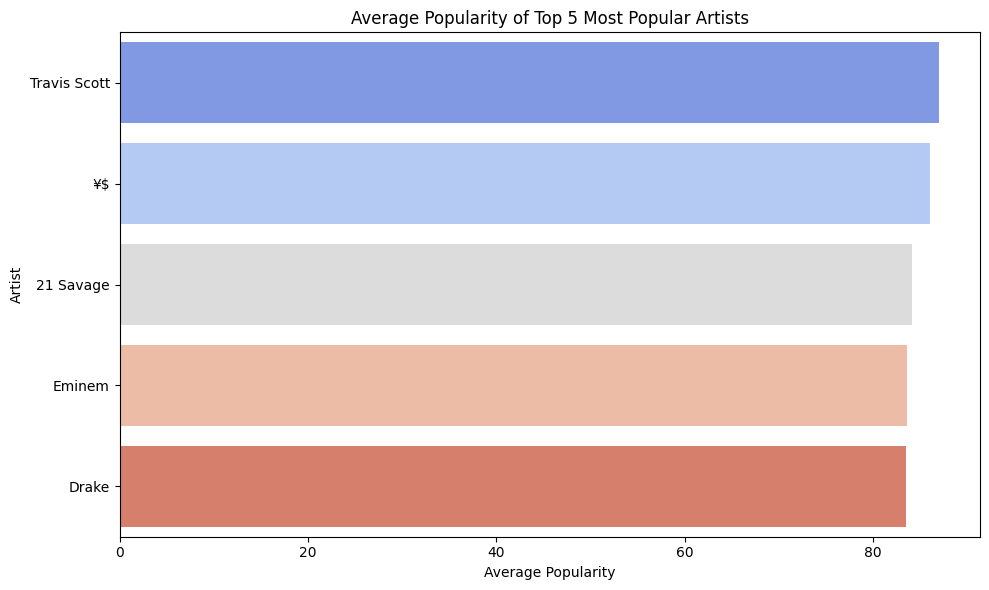

In [388]:
#plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=average_popularity, x='Popularity', y='Artist', palette='coolwarm')
plt.title('Average Popularity of Top 5 Most Popular Artists')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [ ]:
#Q7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
#Totoal Popularity per artist
total_popularity = df.groupby('Artist')['Popularity'].sum().reset_index()


In [389]:
total_popularity

,Artist,Popularity
0,*NSYNC,67
1,2 Chainz,72
2,21 Savage,926
3,A Boogie Wit da Hoodie,80
4,A$AP Ferg,69
...,...,...
110,Young Nudy,67
111,Young Thug,295
112,benny blanco,72
113,cassö,92


In [390]:
#Get top 5 artists by total popularity
top5_artists = total_popularity.sort_values(by='Popularity', ascending=False).head(5)['Artist']

In [392]:
#filter the orginal Dataframe to include only these artists
top5_df = df[df['Artist'].isin(top5_artists)]


In [393]:
top5_df

,Artist,Track Name,Popularity,Duration (ms),Track ID,duration_min
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6,5.319850
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0,2.899767
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE,4.335183
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU,4.124067
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe,3.639400
...,...,...,...,...,...,...
294,Drake,Wants and Needs (feat. Lil Baby),81,192956,65OVbaJR5O1RmwOQx0875b,3.215933
298,Drake,Girls Want Girls (with Lil Baby),78,221979,37Nqx7iavZpotJSDXZWbJ3,3.699650
410,Drake,Money In The Grave (Drake ft. Rick Ross),79,205426,5ry2OE6R2zPQFDO85XkgRb,3.423767
417,Drake,You Only Live Twice (with Lil Wayne & Rick Ross),65,213103,50ceCGZ3oD3U5caQV5bP6f,3.551717


In [394]:
#for each artist, get the track with highest popularity
most_popular_tracks = top5_df.sort_values(by='Popularity', ascending=False).groupby('Artist').first().reset_index()


In [395]:
most_popular_tracks

,Artist,Track Name,Popularity,Duration (ms),Track ID,duration_min
0,21 Savage,redrum,96,270697,52eIcoLUM25zbQupAZYoFh,4.511617
1,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6,5.319850
2,Eminem,Without Me,90,290320,7lQ8MOhq6IN2w8EYcFNSUk,4.838667
3,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA,3.195000
4,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN,4.405400


In [396]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID',
       'duration_min'],
      dtype='object')

In [397]:
df.describe()

,Popularity,Duration (ms),duration_min
count,440.000000,440.000000,440.000000
mean,75.736364,206810.040909,3.446834
std,9.886534,53576.930289,0.892949
min,29.000000,81666.000000,1.361100
25%,70.000000,172778.500000,2.879642
50%,77.000000,201866.000000,3.364433
75%,83.000000,235119.750000,3.918662
max,97.000000,501648.000000,8.360800


In [398]:
#Q8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.
df = df.dropna(subset=['Popularity','Duration (ms)', 'duration_min'])

In [400]:
#convert duration from milliseconds to minutes for better readability
df['duration_min'] = df['Duration (ms)'] / 60000


In [401]:
df['duration_min']

,duration_min
0,5.319850
1,2.899767
2,4.335183
3,4.124067
4,3.639400
...,...
435,3.697717
436,3.198333
437,4.728217
438,3.673467


In [404]:
#Select relevant numerical columns for the pair plot
numerical_columns = ['Popularity', 'Duration (ms)', 'duration_min']

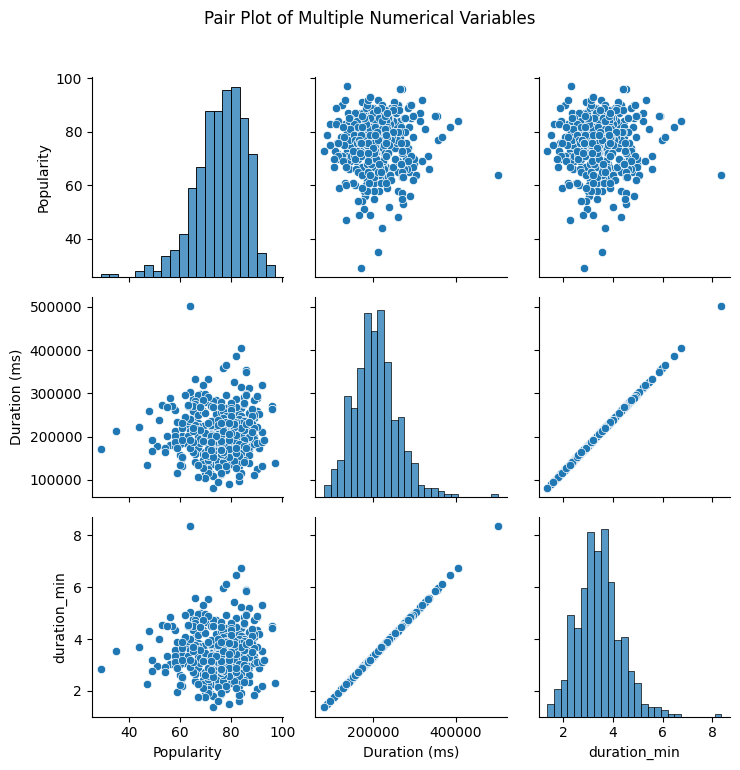

In [409]:
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Multiple Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
#Q9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

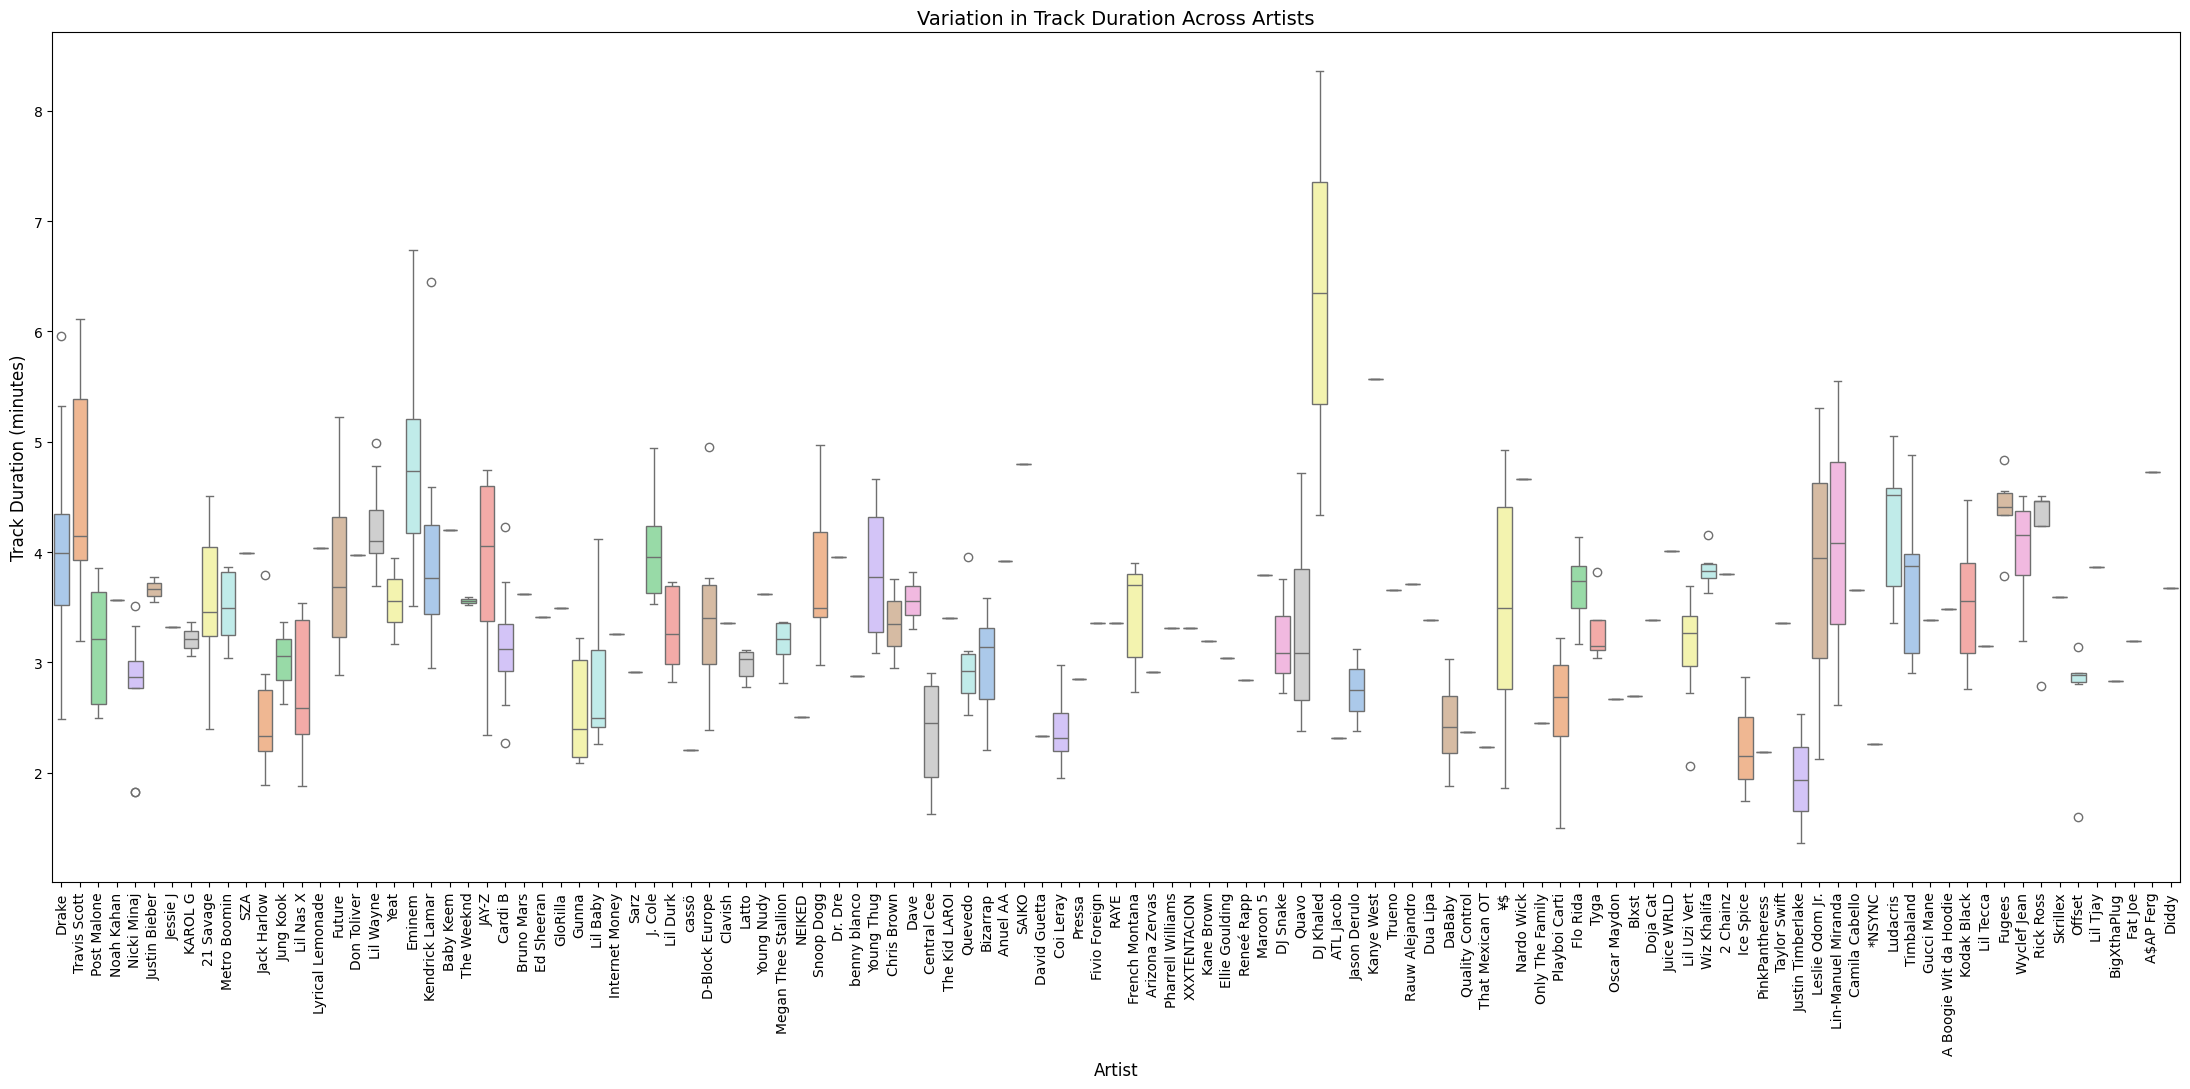

In [431]:
df = df.dropna(subset=['Duration (ms)', 'Artist'])
#convert duration to minutes for better readability
df['duration_min'] = df['Duration (ms)'] / 60000

#Plot box
plt.figure(figsize=(22, 11))
sns.boxplot(data=df, x='Artist', y='duration_min', palette='pastel')
plt.title('Variation in Track Duration Across Artists', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Track Duration (minutes)', fontsize=12)
plt.xticks(rotation=90)  # Rotate artist names for better readability
plt.tight_layout()
plt.show()

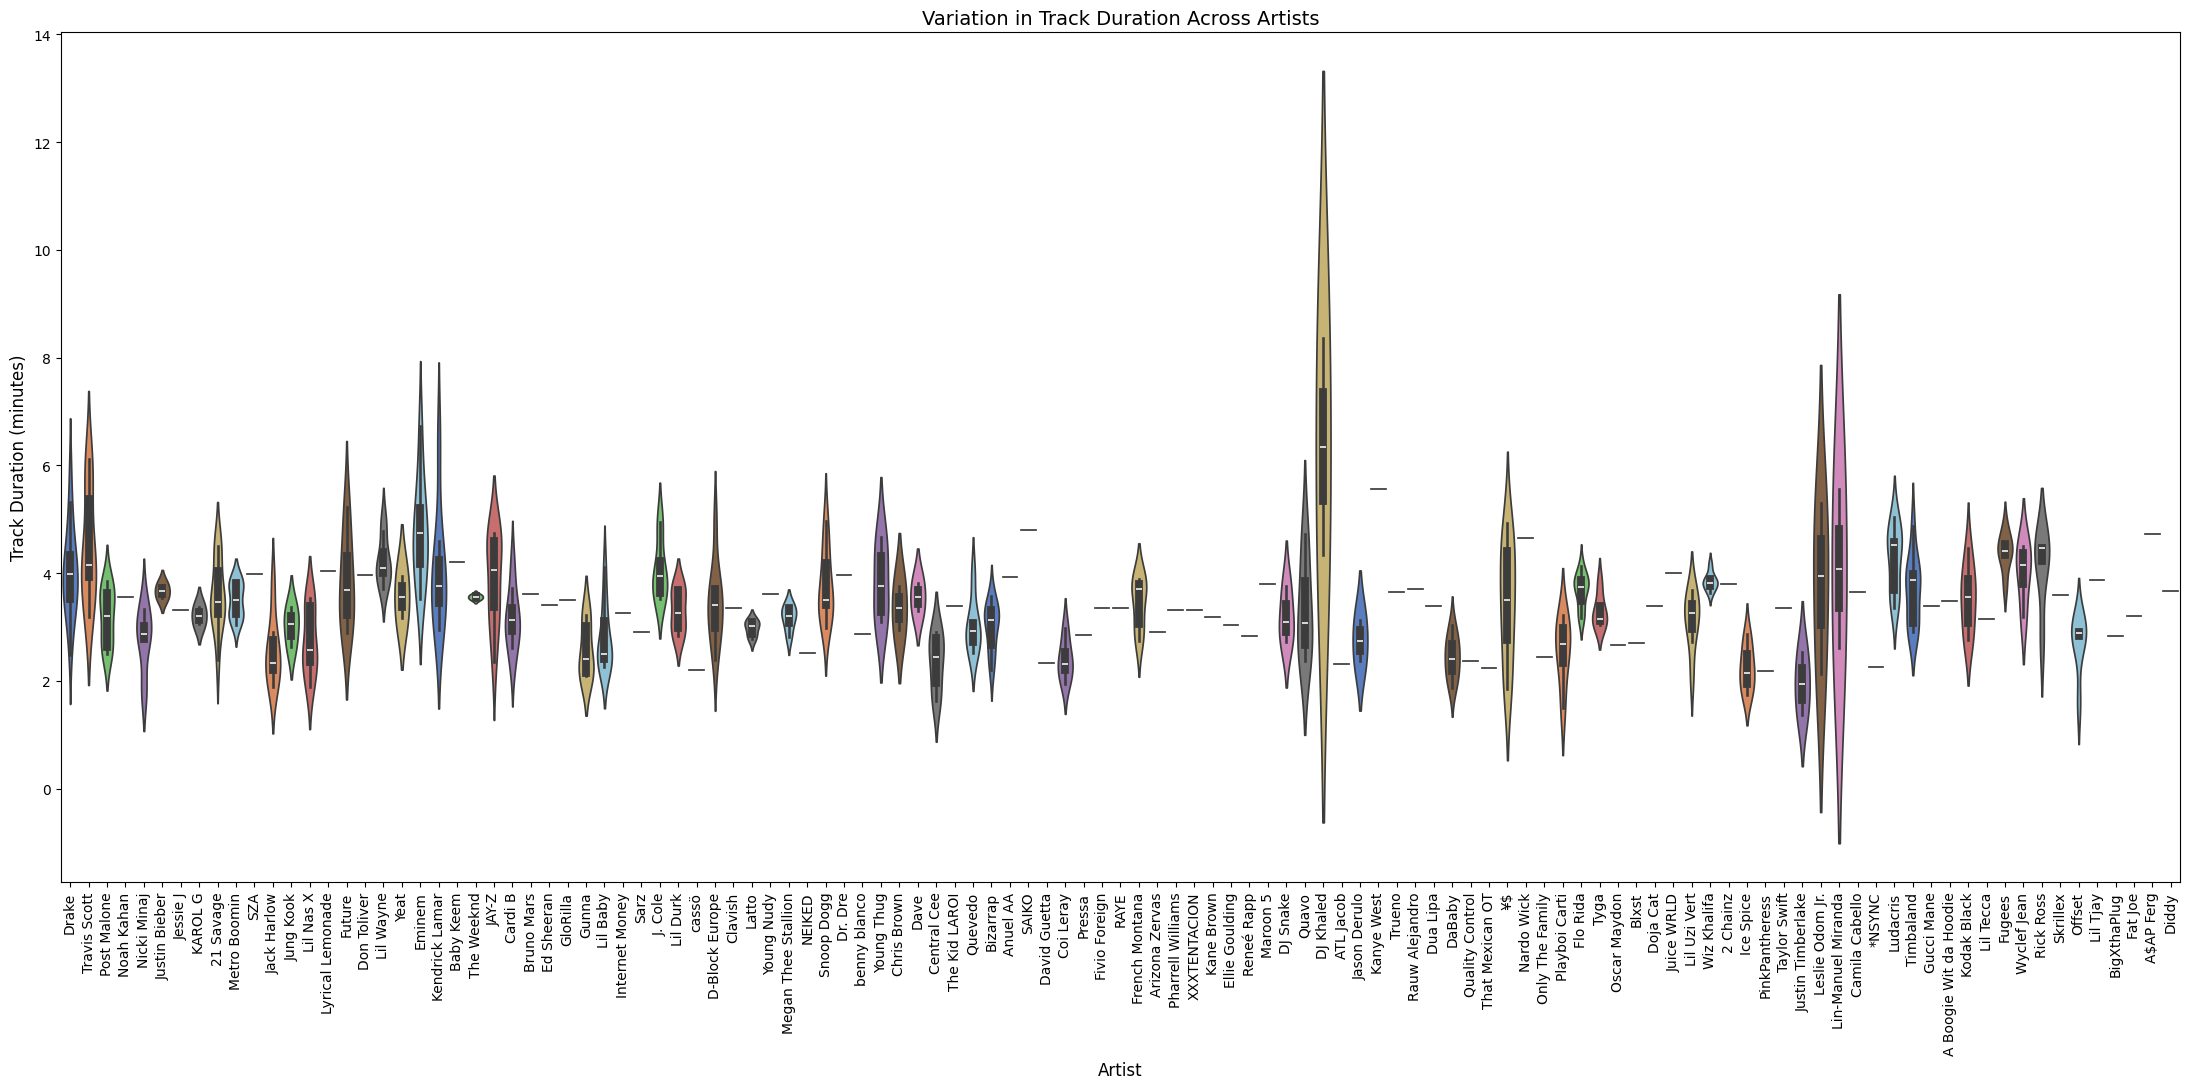

In [430]:
#Plot a violin plot to show
plt.figure(figsize=(22, 11))
sns.violinplot(data=df, x='Artist', y='duration_min', palette='muted')
plt.title('Variation in Track Duration Across Artists', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Track Duration (minutes)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

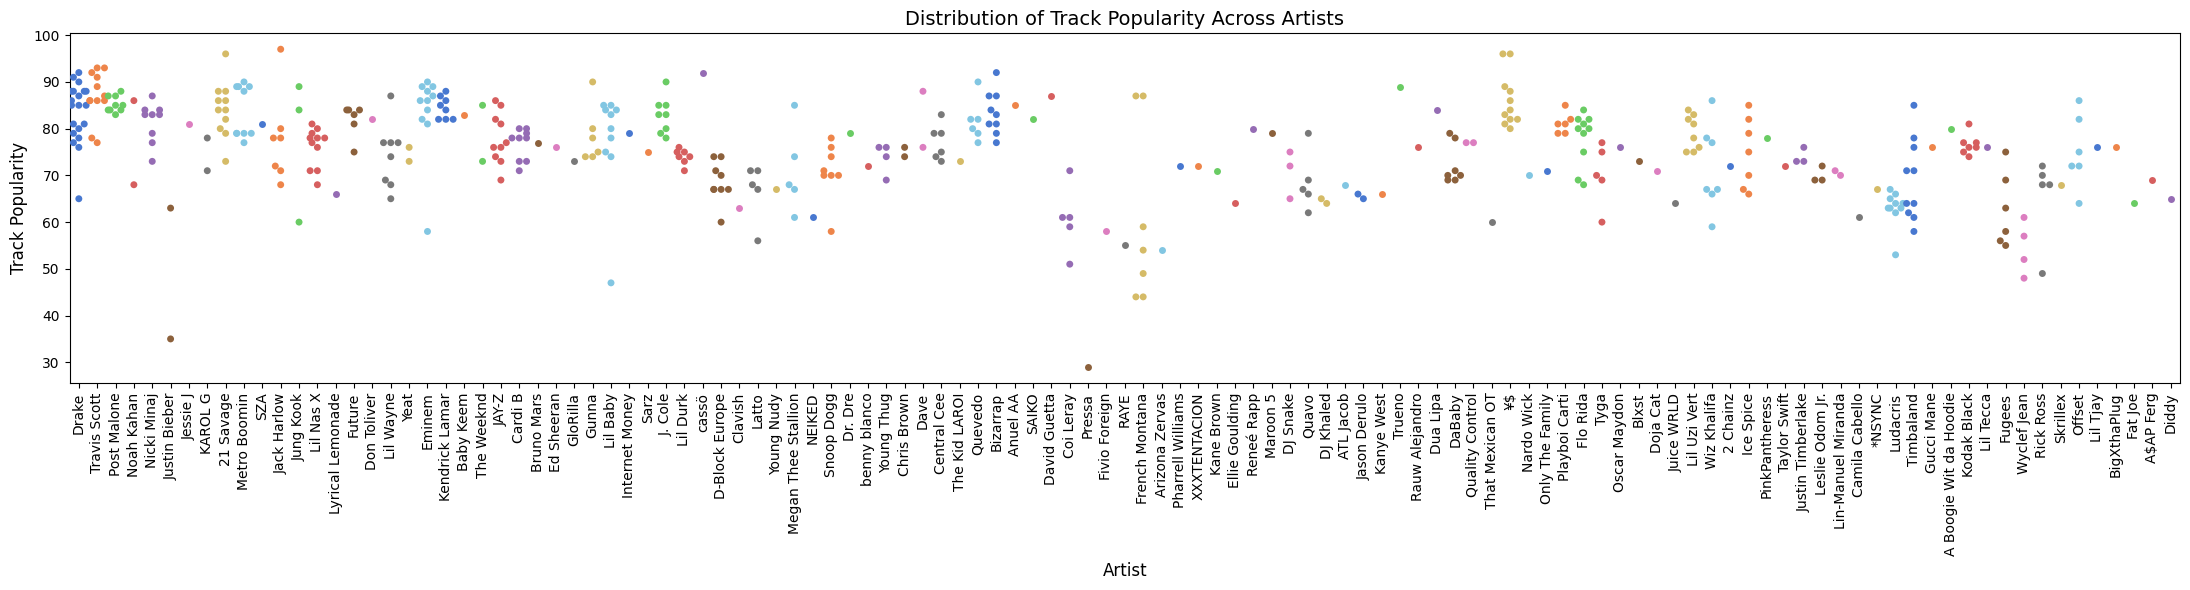

In [429]:
#Q10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(22, 6))
sns.swarmplot(data=df, x='Artist', y='Popularity', palette='muted')

# Title and labels
plt.title('Distribution of Track Popularity Across Artists', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

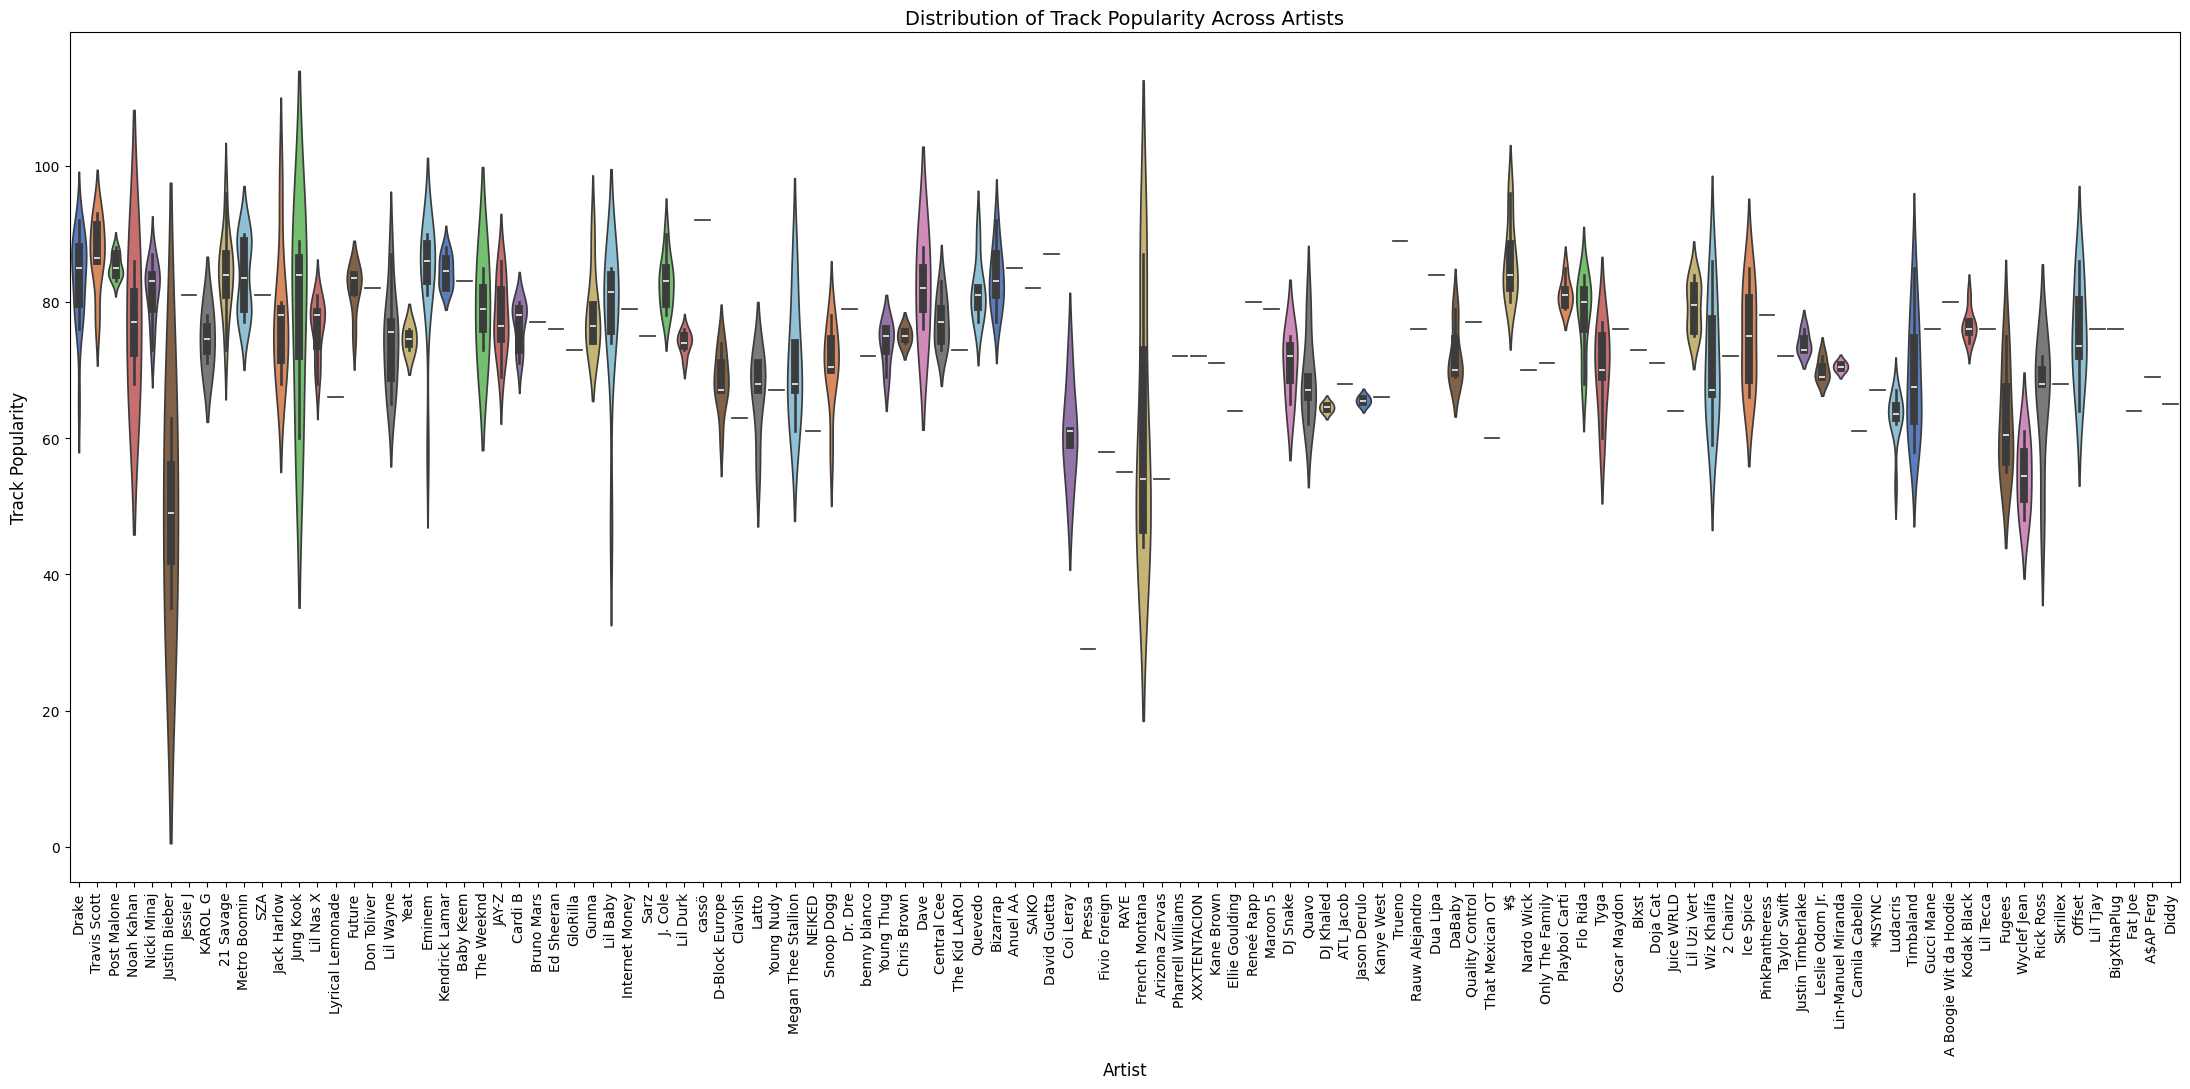

In [428]:
#Plot a violin
plt.figure(figsize=(22, 11))
sns.violinplot(data=df, x='Artist', y='Popularity', palette='muted')
plt.title('Distribution of Track Popularity Across Artists', fontsize=14)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()